# Data Set: Police Incident Blotter

https://data.wprdc.org/dataset/uniform-crime-reporting-data

Notebook made by Mara Parker

Desc of Data from Website:

"The Police Blotter Archive contains crime incident data after it has been validated and processed to meet Uniform Crime Reporting (UCR) standards, published on a nightly basis. This data validation process creates a data publishing delay of approximately thirty days. Users who require the most recent incident data should use the 30 Day Police Blotter. The 30 Day Police Blotter dataset contains more recent data, but has not yet been run through quality control and standardization procedures by the Police Bureau. All data is reported at the block/intersection level, with the exception of sex crimes, which are reported at the police zone level.
This dataset only contains information reported by City of Pittsburgh Police, and does not contain incidents that solely involve other police departments operating within the city (campus police, Port Authority, etc.)"

Desc.

This notebook will cover instances of crime in the greater Pittsurgh area. It is not categorized by any specific crime, but rather the location in which a crime of any sort was reported.

---

## Which neighborhood has the fewest instances of police reported crime?

The following cells show the importation of pandas and the dataset.

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
incident_pgh = pd.read_csv("moredata.csv")

Some lines of data will be shown to help visualize the data that will be represented in this submetric.

In [4]:
incident_pgh.head(10)

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
5,6,2802321,16000045.0,23,2016-01-01T00:24:00,"1300 Block E CARSON ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 3503.B1I DEF. TRESPA...,1702.0,3.0,4.0,-79.985175,40.428607
6,7,2802313,16000031.0,4,2016-01-01T00:44:00,"1200 Block Lakewood ST Pittsburgh, PA 15220",Y,Elliott,6,AGG ASSAULT/OTHER/INJURY,2702 Aggravated Assault.,2020.0,2.0,5.0,-80.041147,40.447956
7,8,2802339,16000077.0,23,2016-01-01T00:45:00,"1500 Block E Carson ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 5503(a)(1) DISORDERL...,1702.0,3.0,4.0,-79.983307,40.428685
8,9,2802343,16000083.0,10,2016-01-01T00:55:00,"1200 Block Nolan CT Pittsburgh, PA 15221",Y,Homewood North,5,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",1301.0,9.0,2.0,-79.886893,40.459431
9,10,2801341,16000884.0,5,2016-01-01T01:00:00,"2400 Block Berg ST Pittsburgh, PA 15203",N,South Side Slopes,3,BURGLARY/FORCE ENT/RES,3502 Burglary.,1608.0,3.0,4.0,-79.972382,40.419609


As one could likely tell, a lot of the data here is irrelevent to the goal of displaying our submetric, so we are going to get rid of some of it to clear things up a bit.

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

incident_pgh = pd.read_csv("moredata.csv")

ncident_pgh = incident_pgh.drop(columns=['PK', 'CCR', 'CLEAREDFLAG', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'INCIDENTZONE'])
incident_pgh = incident_pgh.rename(columns={'INCIDENTNEIGHBORHOOD': 'Neighborhood'})

location_count = incident_pgh["Neighborhood"].value_counts()

location_count = pd.DataFrame(location_count).sort_index()

neighborhoods = gpd.read_file('Neighborhoods_.shp')

import pandas as pd
import matplotlib.pyplot as plt



Then we are going to visualize this data on a bar graph and see where the most incidents occur.

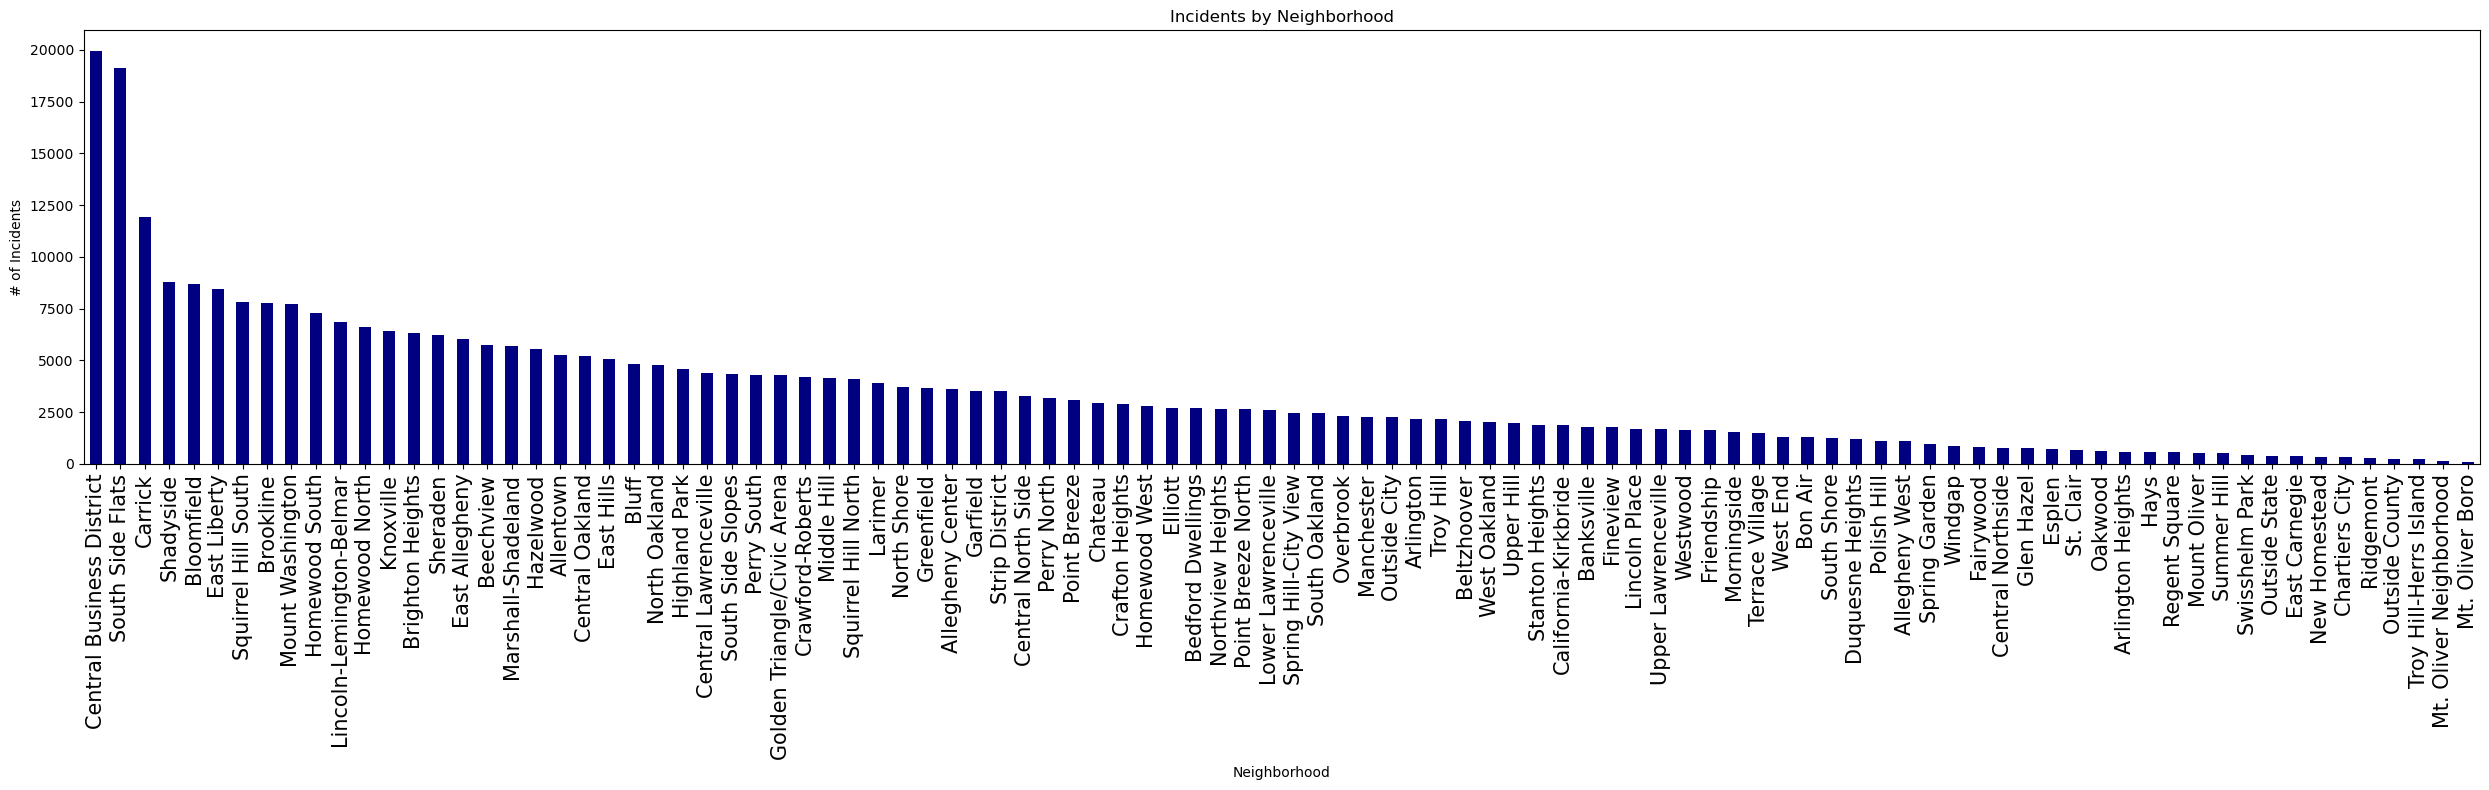

In [5]:
neighborhood_count = incident_pgh["Neighborhood"].value_counts()

plt.figure(figsize=(25,8))
neighborhood_count.plot(kind='bar', color='navy')
plt.title('Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('# of Incidents')
plt.xticks(rotation=90, fontsize=15)
plt.tight_layout()
plt.show()

As you can see, the Central Business District and the South Side Flats most certainly take up the most instances of 

---

It is important to mention that since the specific type of crime is not made clear, this assesment may not be for everyone. However, if you are trying to find the safest place to live by the standard of the least amount of (reported) crime, then Mt. Oliver Boror is most certainly your place!

All of that being said, this data reached back all of the way to 1978, which is pretty crazy! And more than crazy, it also make the data we have pretty stinking irrelevant, so for this next graph we are going to only show data from 2022 onward.

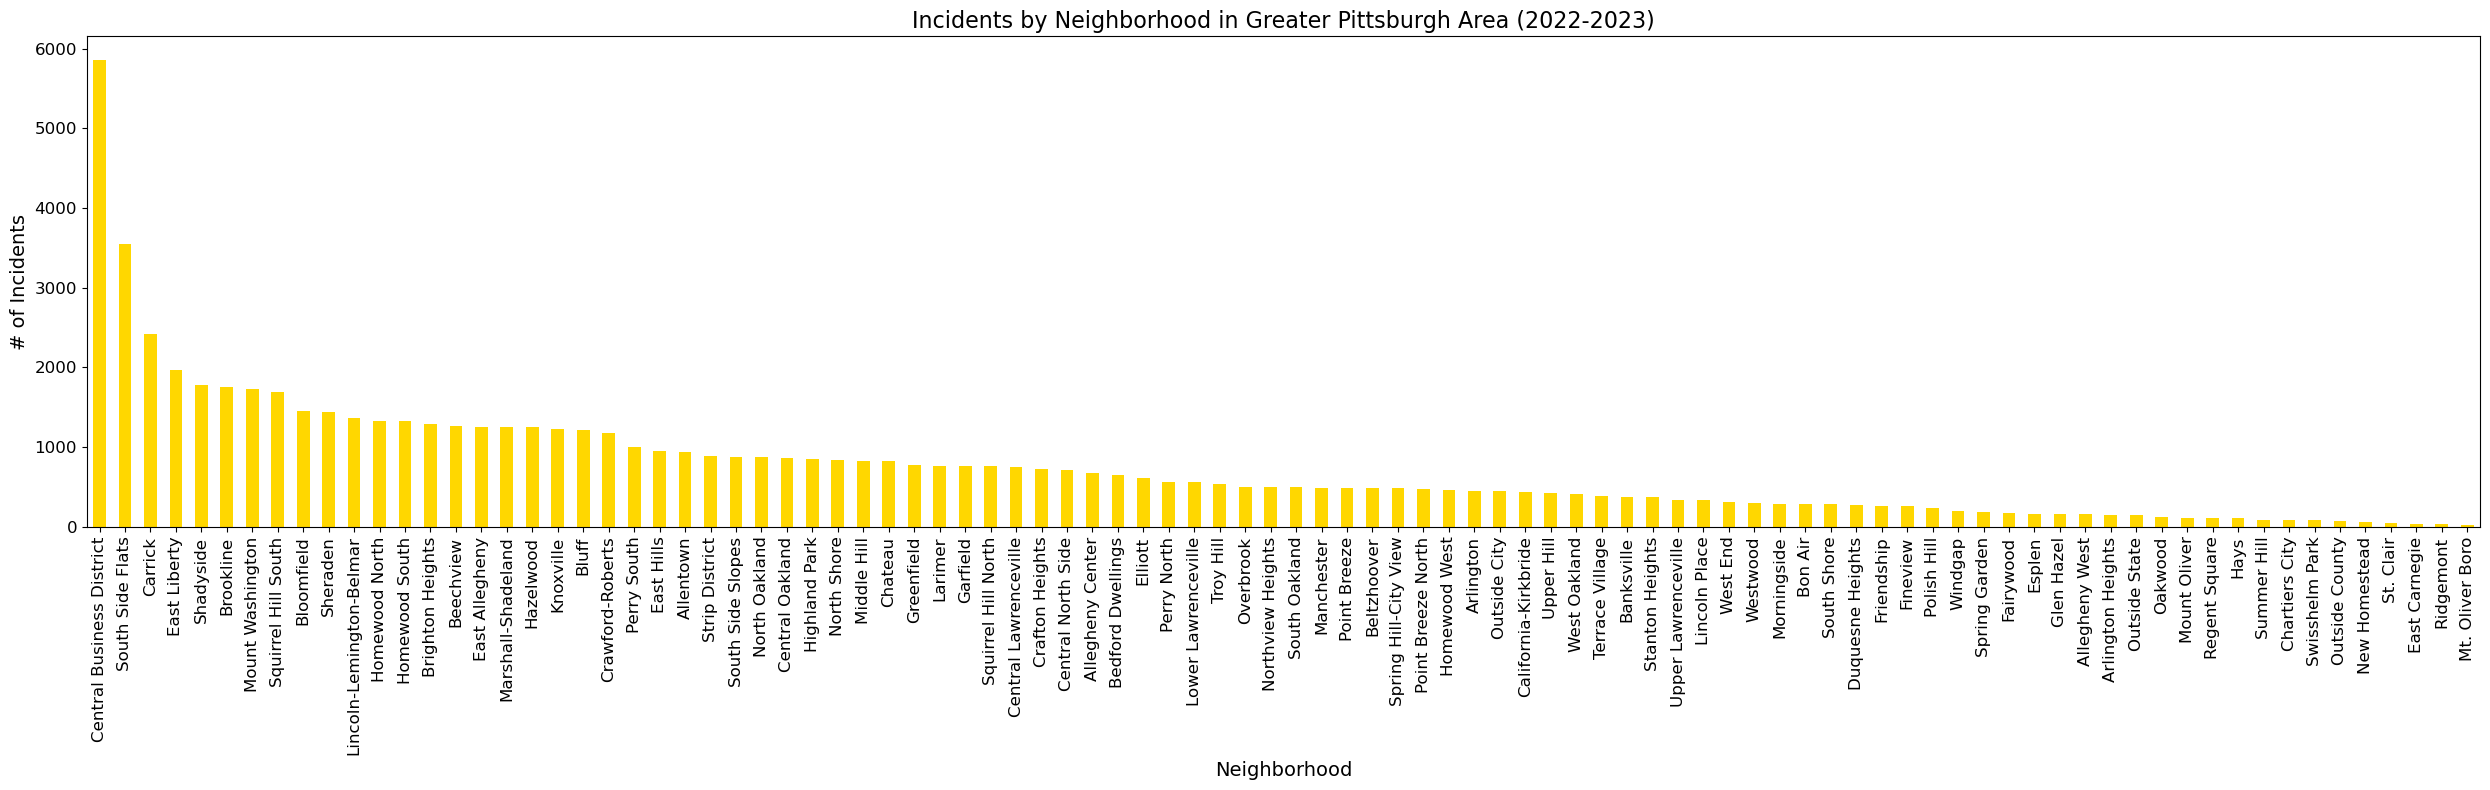

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

incident_pgh = pd.read_csv("moredata.csv")

incident_pgh['INCIDENTTIME'] = pd.to_datetime(incident_pgh['INCIDENTTIME'])


incident_pgh_2022_2023 = incident_pgh[incident_pgh['INCIDENTTIME'].dt.year.isin([2022, 2023])]


neighborhood_count_2022_2023 = incident_pgh_2022_2023["INCIDENTNEIGHBORHOOD"].value_counts()


plt.figure(figsize=(25, 8))
neighborhood_count_2022_2023.plot(kind='bar', color='gold', fontsize=12)
plt.title('Incidents by Neighborhood in Greater Pittsburgh Area (2022-2023)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('# of Incidents', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


Now, with this updated data set we see some somewhat different figures. The number of instances in South Side Flats is surprisingly a bit lower, still not good, but better. More notably, one of the bottom two changed to Ridgemont. However, Mt. Oliver Boro still reigns on top. 